In [2]:
import cv2
import numpy as np

In [3]:
i = np.zeros((512,512))
i = np.uint8(i)
cv2.imwrite("trail_image.png", i)

True

In [4]:
i = np.zeros((512,512))
i[0:256,0:256] = 255
i[256:512,0:257] = 127
i[256:512,256:512] = 255
i = np.uint8(i)
cv2.imwrite("trail_image1.png", i)

True

In [5]:
## Color Image ----- B- G- R
i = np.zeros((512, 512, 3))
i[:,:,0:3] = 0
i[:256,:256,0:3] = 255 ## White
i[:256,256:,2] = 255 ## Red

i[256:,:256,1] = 255 ### Yellow
i[256:,:256,2] = 255 ### Yellow

i[256:,256:,0] = 255 ### Blue

i = np.uint8(i)
cv2.imwrite("color_image.png", i)

True

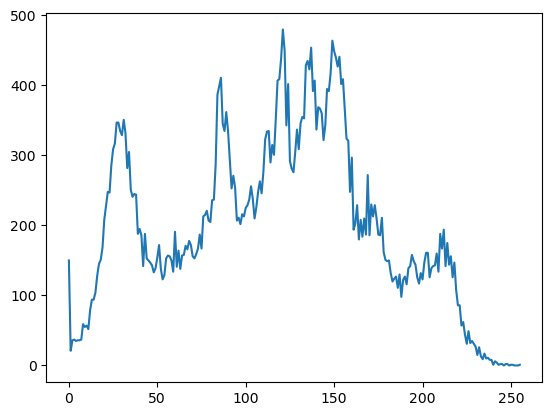

In [6]:
img = cv2.imread("lena.jpeg",0)
hist = np.zeros(256)
s = img.shape
for i in range(s[0]):
    for j in range(s[1]):
        pixel = img[i,j]
        hist[pixel] = hist[pixel] + 1

import matplotlib.pyplot as plt
plt.plot(hist)

In [7]:
#### Threshold of Any Image
img = cv2.imread("lena.jpeg",0)
hist = np.zeros(256)
s = img.shape
for i in range(s[0]):
    for j in range(s[1]):
        pixel = img[i,j]
        if(pixel < 127):
            img[i, j] = 0
        else:
            img[i, j] = 255
        hist[pixel] = hist[pixel] + 1

cv2.imwrite("lena_threshold.png", img)

True

In [8]:
#### Negative of Image
img = cv2.imread("lena.jpeg",0)
hist = np.zeros(256)
s = img.shape
for i in range(s[0]):
    for j in range(s[1]):
        pixel = img[i,j]
        img[i, j] = 255 - pixel

cv2.imwrite("lena_negative.png", img)

True

True

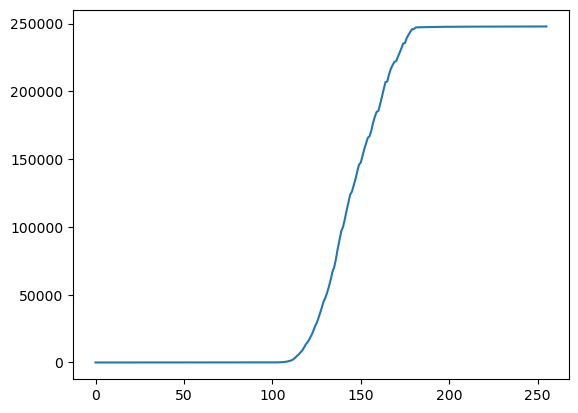

In [11]:
#### Histogram Comparision -  Cumulative Histogam

img = cv2.imread("fog.jpg",0)
hist = np.zeros(256)
s = img.shape
for i in range(s[0]):
    for j in range(s[1]):
        pixel = img[i,j]
        hist[pixel] = hist[pixel] + 1

cum_hist = np.zeros(256)
cum_hist[0] = hist[0]
for i in range(1, 256):
    cum_hist[i] = hist[i] + cum_hist[i-1]

plt.plot(cum_hist)

norm_cum_hist = cum_hist/cum_hist[-1]
norm_cum_hist = norm_cum_hist * 255

new_image = np.zeros(s)

for i in range(s[0]):
    for j in range(s[1]):
        pixel = img[i, j]
        new_image[i, j] = round(norm_cum_hist[pixel])


cv2.imwrite("fog_hist_eq.png", new_image)